<a href="https://colab.research.google.com/github/ArulselvanMadhavan/CSC508/blob/main/RF_Hungarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
columns = ["Age","Sex","Chest_pain_type","At_rest_bp","Cholesterol","Fast_blood_sug","Rest_ecg","Maxhr","Exer_angina","Oldpeak","Slope","Ca","Thal","Diag"]
data = pd.read_csv('https://raw.githubusercontent.com/pleunipennings/CSC508Data/main/processed.hungarian.data.txt',header=None,names=columns)

In [3]:
data.describe()

,Age,Sex,Chest_pain_type,Oldpeak,Diag
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [4]:
data["Diag"].value_counts()

0    188
1    106
Name: Diag, dtype: int64

In [5]:
missing_values = data.loc[(data['Thal'] == "?") | (data['Ca'] == "?")]
missing_values

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak,Slope,Ca,Thal,Diag
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [6]:
data.count()

Age                294
Sex                294
Chest_pain_type    294
At_rest_bp         294
Cholesterol        294
Fast_blood_sug     294
Rest_ecg           294
Maxhr              294
Exer_angina        294
Oldpeak            294
Slope              294
Ca                 294
Thal               294
Diag               294
dtype: int64

In [7]:
(data=='?').sum()

Age                  0
Sex                  0
Chest_pain_type      0
At_rest_bp           1
Cholesterol         23
Fast_blood_sug       8
Rest_ecg             1
Maxhr                1
Exer_angina          1
Oldpeak              0
Slope              190
Ca                 291
Thal               266
Diag                 0
dtype: int64

In [8]:
cleaned_data = data.drop(['Ca', 'Thal', 'Slope'], axis=1)
(cleaned_data=='?').sum()

Age                 0
Sex                 0
Chest_pain_type     0
At_rest_bp          1
Cholesterol        23
Fast_blood_sug      8
Rest_ecg            1
Maxhr               1
Exer_angina         1
Oldpeak             0
Diag                0
dtype: int64

In [9]:
cleaned_data = cleaned_data.replace('?', np.nan)
for col in ['At_rest_bp', 'Cholesterol','Fast_blood_sug','Rest_ecg','Maxhr','Exer_angina']:
  cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].median())

In [10]:
labels = np.array(cleaned_data["Diag"])
features = cleaned_data.drop(columns='Diag')

In [11]:
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak
0,28,1,2,130,132,0,2,185,0,0.0
1,29,1,2,120,243,0,0,160,0,0.0
2,29,1,2,140,243,0,0,170,0,0.0
3,30,0,1,170,237,0,1,170,0,0.0
4,31,0,2,100,219,0,1,150,0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5
290,54,0,3,130,294,0,1,100,1,0.0
291,56,1,4,155,342,1,0,150,1,3.0
292,58,0,2,180,393,0,0,110,1,1.0


In [12]:
X = features
y = labels
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
print("number patients with no heart disease = " + str(np.count_nonzero(y==0)))
print("number patients with heart disease = " + str(np.count_nonzero(y==1)))

number patients with no heart disease = 188
number patients with heart disease = 106


In [14]:
print("The dimension of the table is:",cleaned_data.shape)

The dimension of the table is: (294, 11)


In [15]:
labels = np.array(cleaned_data["Diag"])
features = cleaned_data.drop(columns='Diag')

In [16]:
features

,Age,Sex,Chest_pain_type,At_rest_bp,Cholesterol,Fast_blood_sug,Rest_ecg,Maxhr,Exer_angina,Oldpeak
0,28,1,2,130,132,0,2,185,0,0.0
1,29,1,2,120,243,0,0,160,0,0.0
2,29,1,2,140,243,0,0,170,0,0.0
3,30,0,1,170,237,0,1,170,0,0.0
4,31,0,2,100,219,0,1,150,0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5
290,54,0,3,130,294,0,1,100,1,0.0
291,56,1,4,155,342,1,0,150,1,3.0
292,58,0,2,180,393,0,0,110,1,1.0


In [17]:

print("number patients with no heart disease = " + str(np.count_nonzero(y==0)))
print("number patients with heart disease = " + str(np.count_nonzero(y==1)))

number patients with no heart disease = 188
number patients with heart disease = 106


In [18]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [19]:
test_labels

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, max_features = "auto", bootstrap = True, random_state = 42)
rf.fit(train_features, train_labels);
predictions = rf.predict(test_features)
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1])

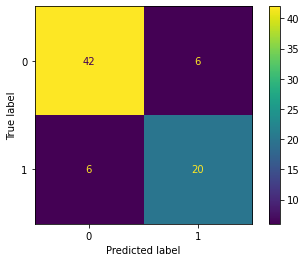

In [23]:
metrics.confusion_matrix(test_labels, predictions)
metrics.plot_confusion_matrix(rf, test_features, test_labels)

In [24]:
acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
print("Accuracy:",acc,"%")

Accuracy: 83.78 %


# Accuracy vs Number of Estimators
1. Below results show how accuracy fared for different values of estimators 2,4,6,8,10

In [30]:
for f_sel in ["sqrt", "log2", 0.5]:
  for x in range(2,12,2):
    rf_small = RandomForestClassifier(n_estimators = x, max_features = f_sel, bootstrap = True, random_state = 42)
    rf_small.fit(train_features, train_labels)
    predictions = rf_small.predict(test_features)
    # metrics.confusion_matrix(test_labels, predictions)
    # metrics.plot_confusion_matrix(rf_small, test_features, test_labels)
    acc = round(100*metrics.accuracy_score(predictions, test_labels),2)
    print(f"Max_features:{f_sel}\tNum_estimators:{x}\tAccuracy:{acc}%")

Max_features:sqrt	Num_estimators:2	Accuracy:72.97%
Max_features:sqrt	Num_estimators:4	Accuracy:72.97%
Max_features:sqrt	Num_estimators:6	Accuracy:78.38%
Max_features:sqrt	Num_estimators:8	Accuracy:78.38%
Max_features:sqrt	Num_estimators:10	Accuracy:81.08%
Max_features:log2	Num_estimators:2	Accuracy:72.97%
Max_features:log2	Num_estimators:4	Accuracy:72.97%
Max_features:log2	Num_estimators:6	Accuracy:78.38%
Max_features:log2	Num_estimators:8	Accuracy:78.38%
Max_features:log2	Num_estimators:10	Accuracy:81.08%
Max_features:0.5	Num_estimators:2	Accuracy:71.62%
Max_features:0.5	Num_estimators:4	Accuracy:71.62%
Max_features:0.5	Num_estimators:6	Accuracy:71.62%
Max_features:0.5	Num_estimators:8	Accuracy:77.03%
Max_features:0.5	Num_estimators:10	Accuracy:79.73%
